In [1]:
'''
【课程1.3】  对比分析

对比分析 → 两个互相联系的指标进行比较

绝对数比较（相减） / 相对数比较（相除）
结构分析、比例分析、空间比较分析、动态对比分析

'''

'\n【课程1.3】  对比分析\n\n对比分析 → 两个互相联系的指标进行比较\n\n绝对数比较（相减） / 相对数比较（相除）\n结构分析、比例分析、空间比较分析、动态对比分析\n\n'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["font.sans-serif"]='SimHei'#解决中文乱码
plt.rcParams['axes.unicode_minus'] = False#解决负号无法正常显示的问题

                A_sale      B_sale
2017-06-01  957.354538  989.002898
2017-06-02  438.694666  309.715577
2017-06-03  194.954973  158.311162
2017-06-04  580.904061  883.938357
2017-06-05   91.183744  878.184762


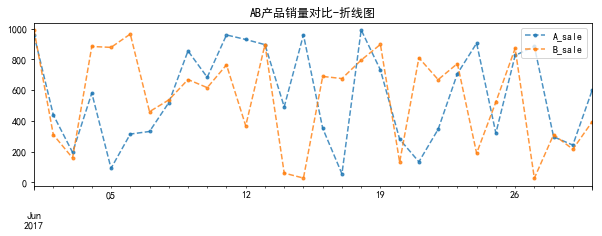

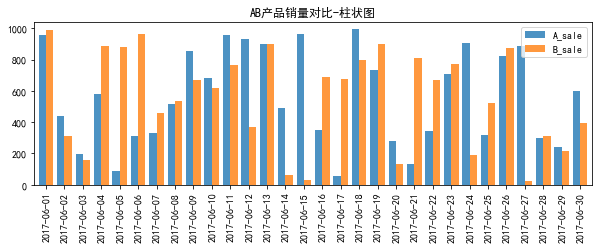

In [5]:
# 1、绝对数比较 → 相减
# 相互对比的指标在量级上不能差别过大
# （1）折线图比较
# （2）多系列柱状图比较
data = pd.DataFrame(np.random.rand(30,2)*1000,
                   columns = ['A_sale','B_sale'],
                   index = pd.period_range('20170601','20170630'))
print(data.head())
# 创建数据 → 30天内A/B产品的日销售额
data.plot(kind='line',
       style = '--.',
       alpha = 0.8,
       figsize = (10,3),
       title = 'AB产品销量对比-折线图')
# 折线图比较
data.plot(kind = 'bar',
          width = 0.8,
          alpha = 0.8,
          figsize = (10,3),
          title = 'AB产品销量对比-柱状图')
# 多系列柱状图比较

[Text(0,0,'2017-06-01'),
 Text(0,0,'2017-06-07'),
 Text(0,0,'2017-06-13'),
 Text(0,0,'2017-06-19'),
 Text(0,0,'2017-06-25')]

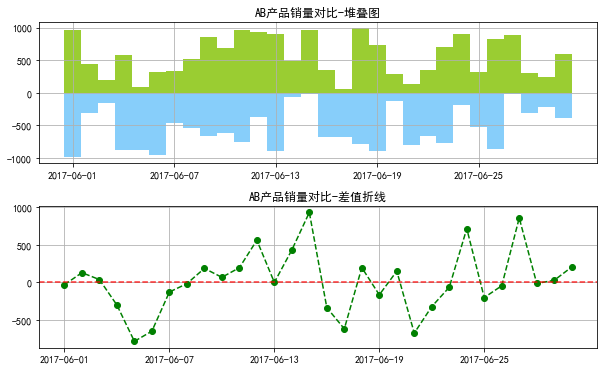

In [6]:
# 1、绝对数比较 → 相减
# （3）柱状图堆叠图+差值折线图比较
fig3 = plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace=0.3)
# 创建子图及间隔设置

ax1 = fig3.add_subplot(2,1,1)  
x = range(len(data))
y1 = data['A_sale']
y2 = -data['B_sale']
plt.bar(x,y1,width = 1,facecolor = 'yellowgreen')
plt.bar(x,y2,width = 1,facecolor = 'lightskyblue')
plt.title('AB产品销量对比-堆叠图')
plt.grid()
plt.xticks(range(0,30,6))
ax1.set_xticklabels(data.index[::6])
# 创建堆叠图

ax2 = fig3.add_subplot(2,1,2)  
y3 = data['A_sale']-data['B_sale']
plt.plot(x,y3,'--go')
plt.axhline(0,hold=None,color='r',linestyle="--",alpha=0.8)  # 添加y轴参考线
plt.grid()
plt.title('AB产品销量对比-差值折线')
plt.xticks(range(0,30,6))
ax2.set_xticklabels(data.index[::6])
# 创建差值折线图

                A_sale      B_sale
2017-06-01   55.791070    5.288287
2017-06-02  202.303994   30.893587
2017-06-03  159.919643  143.585549
2017-06-04  497.409977  162.494544
2017-06-05  857.135188   26.217029
------
                A_sale      B_sale     A_per     B_per A_per% B_per%
2017-06-01   55.791070    5.288287  0.004028  0.001894  0.40%  0.19%
2017-06-02  202.303994   30.893587  0.014606  0.011062  1.46%  1.11%
2017-06-03  159.919643  143.585549  0.011546  0.051414  1.15%  5.14%
2017-06-04  497.409977  162.494544  0.035912  0.058185  3.59%  5.82%
2017-06-05  857.135188   26.217029  0.061884  0.009388  6.19%  0.94%


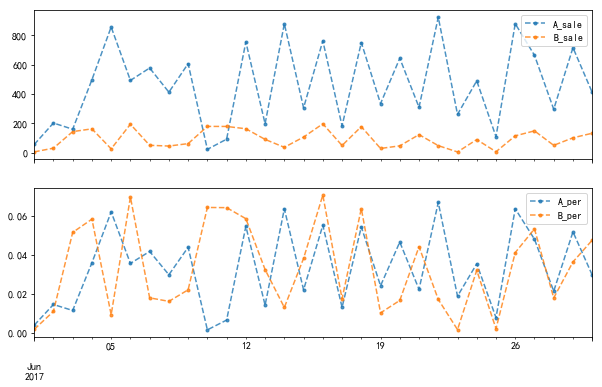

In [7]:
# 2、相对数比较 → 相除
# 有联系的指标综合计算后的对比，数值为相对数
# 结构分析、比例分析、空间比较分析、动态对比分析、计划完成度分析
# （1）结构分析
# 在分组基础上，各组总量指标与总体的总量指标对比，计算出各组数量在总量中所占比重
# 反映总体的内部结构

data = pd.DataFrame({'A_sale':np.random.rand(30)*1000,
                    'B_sale':np.random.rand(30)*200},
                   index = pd.period_range('20170601','20170630'))
print(data.head())
print('------')
# 创建数据 → 30天内A/B产品的日销售额
# A/B产品销售额量级不同

data['A_per'] = data['A_sale'] / data['A_sale'].sum()
data['B_per'] = data['B_sale'] / data['B_sale'].sum()
# 计算出每天的营收占比

data['A_per%'] = data['A_per'].apply(lambda x: '%.2f%%' % (x*100))
data['B_per%'] = data['B_per'].apply(lambda x: '%.2f%%' % (x*100))
# 转换为百分数
print(data.head())

fig,axes = plt.subplots(2,1,figsize = (10,6),sharex=True)
data[['A_sale','B_sale']].plot(kind='line',style = '--.',alpha = 0.8,ax=axes[0])
axes[0].legend(loc = 'upper right')
data[['A_per','B_per']].plot(kind='line',style = '--.',alpha = 0.8,ax=axes[1])
axes[1].legend(loc = 'upper right')
# 绝对值对比较难看出结构性变化，通过看销售额占比来看售卖情况的对比

# 同时可以反应“强度” → 两个性质不同但有一定联系的总量指标对比，用来说明“强度”、“密度”、“普遍程度”
# 例如：国内生产总值“元/人”，人口密度“人/平方公里”

         consumption       salary
2017-01  2188.101402  5037.149816
2017-02  2067.289065  5316.975385
2017-03  2625.453523  5099.482413
2017-04  2754.733890  5164.569081
2017-05  2571.905931  5204.442177
------
         consumption       salary       c_s
2017-01  2188.101402  5037.149816  0.434393
2017-02  2067.289065  5316.975385  0.388809
2017-03  2625.453523  5099.482413  0.514847
2017-04  2754.733890  5164.569081  0.533391
2017-05  2571.905931  5204.442177  0.494175


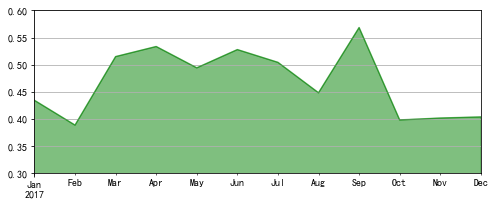

In [8]:
# 2、相对数比较 → 相除
# （2）比例分析
# 在分组的基础上，将总体不同部分的指标数值进行对比，其相对指标一般称为“比例相对数”
# 比例相对数 = 总体中某一部分数值 / 总体中另一部分数值 → “基本建设投资额中工业、农业、教育投资的比例”、“男女比例”...

data = pd.DataFrame({'consumption':np.random.rand(12)*1000 + 2000,
                    'salary':np.random.rand(12)*500 + 5000},
                   index = pd.period_range('2017/1','2017/12',freq = 'M'))
print(data.head())
print('------')
# 创建数据 → 某人一年内的消费、工资薪水情况
# 消费按照2000-3000/月随机，工资按照5000-5500/月随机

data['c_s'] = data['consumption'] / data['salary']
print(data.head())
# 比例相对数 → 消费收入比

data['c_s'].plot.area(color = 'green',alpha = 0.5,ylim = [0.3,0.6],figsize=(8,3),grid=True)
# 创建面积图表达

                      A            B            C           D
2017-06-01  2980.649008   564.590458  3481.034887  245.681847
2017-06-02  1879.653397  1649.926397  7269.390742  544.995141
2017-06-03  4972.035817  1799.640184  9994.489703  434.031188
2017-06-04  4502.878976  1643.390817  4914.091953  148.060748
2017-06-05   757.025226  1829.486690  8958.341236  729.295578
------


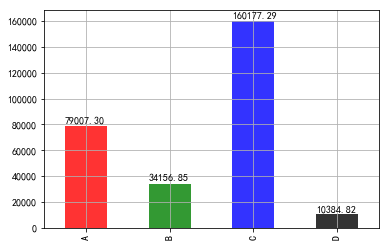

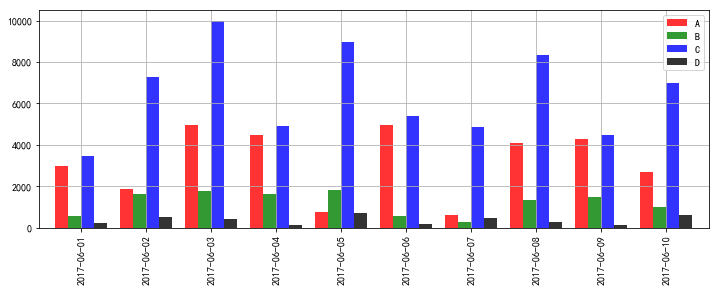

In [9]:
# 2、相对数比较 → 相除
# （3）空间比较分析（横向对比分析）
# 同类现象在同一时间不同空间的指标数值进行对比，反应同类现象在不同空间上的差异程度和现象发展不平衡的状况
# 空间比较相对数 = 甲空间某一现象的数值 / 乙空间同类现象的数值
# 一个很现实的例子 → 绝对数来看，我国多经济总量世界第一，但从人均水平来看是另一回事

data = pd.DataFrame({'A':np.random.rand(30)*5000,
                    'B':np.random.rand(30)*2000,
                    'C':np.random.rand(30)*10000,
                    'D':np.random.rand(30)*800},
                   index = pd.period_range('20170601','20170630'))
print(data.head())
print('------')
# 创建数据 → 30天内A/B/C/D四个产品的销售情况
# 不同产品的销售量级不同

data.sum().plot(kind = 'bar',color = ['r','g','b','k'], alpha = 0.8, grid = True)
for i,j in zip(range(4),data.sum()):
    plt.text(i-0.25,j+2000,'%.2f' % j, color = 'k')
# 通过柱状图做横向比较 → 4个产品的销售额总量

data[:10].plot(kind = 'bar',color = ['r','g','b','k'], alpha = 0.8, grid = True, figsize = (12,4),width = 0.8)
# 多系列柱状图，横向比较前十天4个产品的销售额

# 关于同比与环比
# 同比 → 产品A在2015.3和2016.3的比较（相邻时间段的同一时间点）
# 环比 → 产品A在2015.3和2015.4的比较（相邻时间段的比较）
# 如何界定“相邻时间段”与“时间点”，决定了是同比还是环比

                      A
2017-06-01  1117.724301
2017-06-02  2380.274529
2017-06-03  2108.119624
2017-06-04  2891.668370
2017-06-05  2003.750323
------
                      A  base     l_growth     z_growth    lspeed    zspeed
2017-06-01  1117.724301  1000   117.724301     0.000000  0.117724       NaN
2017-06-02  2380.274529  1000  1380.274529  1262.550228  1.380275  1.129572
2017-06-03  2108.119624  1000  1108.119624  -272.154905  1.108120 -0.114338
2017-06-04  2891.668370  1000  1891.668370   783.548746  1.891668  0.371681
2017-06-05  2003.750323  1000  1003.750323  -887.918047  1.003750 -0.307061
------


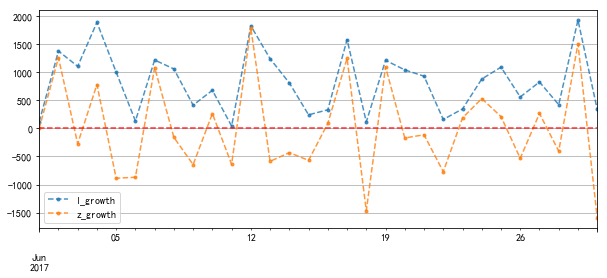

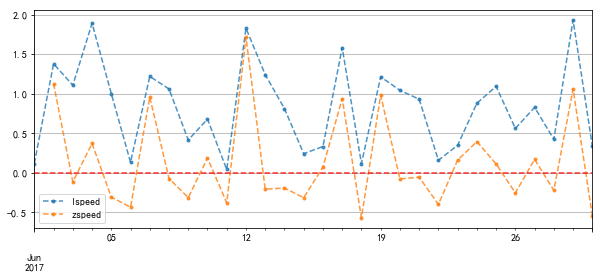

In [10]:
# 2、相对数比较 → 相除
# （4）动态对比分析（纵向对比分析）
# 同一现象在不同时间上的指标数值进行对比，反应现象的数量随着时间推移而发展变动的程度及趋势
# 最基本方法，计算动态相对数 → 发展速度
# 动态相对数（发展速度） = 某一现象的报告期数值 / 同一现象的基期数值
# 基期：用来比较的基础时期
# 报告期：所要研究的时期，又称计算期

data = pd.DataFrame({'A':np.random.rand(30)*2000+1000},
                   index = pd.period_range('20170601','20170630'))
print(data.head())
print('------')
# 创建数据 → 30天内A产品的销售情况

data['base'] = 1000  # 假设基期销售额为1000，后面每一天都为计算期
data['l_growth'] = data['A'] - data['base']  # 累计增长量 = 报告期水平 - 固定基期水平
data['z_growth'] = data['A'] - data.shift(1)['A']  # 逐期增长量 = 报告期水平 - 报告期前一期水平
data[data.isnull()] = 0  # 替换缺失值

data[['l_growth','z_growth']].plot(figsize = (10,4),style = '--.',alpha = 0.8)  
plt.axhline(0,hold=None,color='r',linestyle="--",alpha=0.8)  # 添加y轴参考线
plt.legend(loc = 'lower left')
plt.grid()
# 通过折线图查看增长量情况

data['lspeed'] = data['l_growth'] / data['base']  # 定基增长速度
data['zspeed'] = data['z_growth'] / data.shift(1)['A']  # 环比增长速度
data[['lspeed','zspeed']].plot(figsize = (10,4),style = '--.',alpha = 0.8)  
plt.axhline(0,hold=None,color='r',linestyle="--",alpha=0.8)  # 添加y轴参考线
plt.grid()
print(data.head())
print('------')
# 通过折线图查看发展速度